In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/tiktok/tiktok_dataset.csv


In [2]:
df = pd.read_csv("/kaggle/input/tiktok/tiktok_dataset.csv")

In [3]:
import warnings

warnings.simplefilter(action='ignore', category=FutureWarning)

# Understand The Problem 
TikTok users have the ability to submit reports that identify videos and comments that contain user claims. ***These reports identify content that needs to be reviewed by moderators.*** The process generates a large number of user reports that are challenging to consider in a timely manner.

***TikTok is working on the development of a predictive model that can determine whether a video contains a claim or offers an opinion.*** With a successful prediction model, ***TikTok can reduce the backlog of user reports and prioritize them more efficiently.***

In this situation, we need classification ML models to predict whether a video contains a claim or offers an opinion. However, before building the model, we must ensure that our data is valid. Once the data is verified, we can explore new features to improve the model’s predictive performance.




# Mission 1 - EDA
In this mission, we will inspect and analyze the data.
- We will handle null and NA values, as well as outliers, to ensure model validity.
- We will check whether our data is balanced or imbalanced.
- We will visualize the data to gain a better understanding of its structure and distribution.

In [4]:
df.head(5)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0


| Column Name              | Type  | Description |
|--------------------------|-------|-------------|
| `#`                     | int   | TikTok assigned number for video with claim/opinion. |
| `claim_status`          | obj   | Whether the published video has been identified as an “opinion” or a “claim.” In this dataset, an “opinion” refers to an individual’s or group’s personal belief or thought. A “claim” refers to information that is either unsourced or from an unverified source. |
| `video_id`              | int   | Random identifying number assigned to video upon publication on TikTok. |
| `video_duration_sec`    | int   | How long the published video is measured in seconds. |
| `video_transcription_text` | obj   | Transcribed text of the words spoken in the published video. |
| `verified_status`       | obj   | Indicates the status of the TikTok user who published the video in terms of their verification, either “verified” or “not verified.” |
| `author_ban_status`     | obj   | Indicates the status of the TikTok user who published the video in terms of their permissions: “active,” “under scrutiny,” or “banned.” |
| `video_view_count`      | float | The total number of times the published video has been viewed. |
| `video_like_count`      | float | The total number of times the published video has been liked by other users. |
| `video_share_count`     | float | The total number of times the published video has been shared by other users. |
| `video_download_count`  | float | The total number of times the published video has been downloaded by other users. |
| `video_comment_count`   | float | The total number of comments on the published video. |

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19382 entries, 0 to 19381
Data columns (total 12 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   #                         19382 non-null  int64  
 1   claim_status              19084 non-null  object 
 2   video_id                  19382 non-null  int64  
 3   video_duration_sec        19382 non-null  int64  
 4   video_transcription_text  19084 non-null  object 
 5   verified_status           19382 non-null  object 
 6   author_ban_status         19382 non-null  object 
 7   video_view_count          19084 non-null  float64
 8   video_like_count          19084 non-null  float64
 9   video_share_count         19084 non-null  float64
 10  video_download_count      19084 non-null  float64
 11  video_comment_count       19084 non-null  float64
dtypes: float64(5), int64(3), object(4)
memory usage: 1.8+ MB


- claim_status, verified_status and author_ban_status are categorical data
- 'video_view_count', 'video_like_count', 'video_share_count','video_download_count', 'video_comment_count'are discrete value

We can see there are some missing datas lets find them 

In [6]:
df.isnull().sum()

#                             0
claim_status                298
video_id                      0
video_duration_sec            0
video_transcription_text    298
verified_status               0
author_ban_status             0
video_view_count            298
video_like_count            298
video_share_count           298
video_download_count        298
video_comment_count         298
dtype: int64

We need to analyze missing and NA values to determine whether to remove or fill them. However, it might not be a good idea to fill missing values in claim_status since this feature is very important.

In [7]:
# Drop missing values by claim_status
df = df.dropna(subset ="claim_status")
df.head(3)

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0


In [8]:
df.isnull().sum()

#                           0
claim_status                0
video_id                    0
video_duration_sec          0
video_transcription_text    0
verified_status             0
author_ban_status           0
video_view_count            0
video_like_count            0
video_share_count           0
video_download_count        0
video_comment_count         0
dtype: int64

When we drop null values in the claim_status column, rows containing other null values are also removed.

In [9]:
df.describe()

,#,video_id,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count
count,19084.000000,1.908400e+04,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000,19084.000000
mean,9542.500000,5.624840e+09,32.423811,254708.558688,84304.636030,16735.248323,1049.429627,349.312146
std,5509.220604,2.537030e+09,16.226470,322893.280814,133420.546814,32036.174350,2004.299894,799.638865
min,1.000000,1.234959e+09,5.000000,20.000000,0.000000,0.000000,0.000000,0.000000
25%,4771.750000,3.425100e+09,18.000000,4942.500000,810.750000,115.000000,7.000000,1.000000
50%,9542.500000,5.609500e+09,32.000000,9954.500000,3403.500000,717.000000,46.000000,9.000000
75%,14313.250000,7.840823e+09,47.000000,504327.000000,125020.000000,18222.000000,1156.250000,292.000000
max,19084.000000,9.999873e+09,60.000000,999817.000000,657830.000000,256130.000000,14994.000000,9599.000000



- There are definetly are outliers. We will need to analyze them furter to determine their impact on the dataset and decide whether to remove, transform or keep them for modelling.
- video_view_count, video_like_count, and video_share_count have very large standard deviations, which could indicate something significant. Additionally, the minimum and maximum values of these features differ greatly

## Visualization 

We are investigating which features influence claim_status. Specifically, we aim to determine:
- Is there a connetcion between claim_status and **video_duration_sec**
- Is there a connetcion between claim_status and **video_view_count**
- Is there a connetcion between claim_status and **video_like_count**
- Is there a connetcion between claim_status and **video_share_count**
- Is there a connetcion between claim_status and **video_download_count**
- Is there a connetcion between claim_status and **video_comment_count**
- Is there a connetcion between claim_status and **author_ban_status**



In [10]:
import matplotlib.pyplot as plt 
import seaborn as sns 


In [11]:
# Select columns 
discrete_columns = ['video_duration_sec',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count']


In [12]:
df_corr_subset = df[['video_duration_sec',
       'video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count']]

<Axes: >

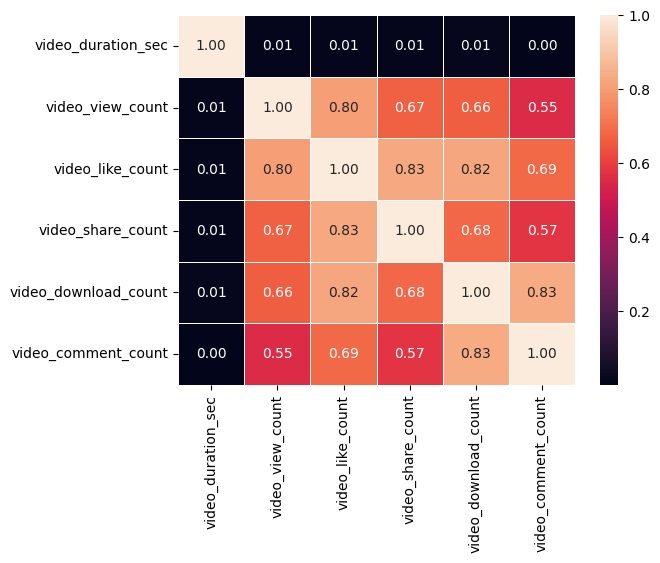

In [13]:
# First let's create heat map 
Correlations = df_corr_subset.corr(numeric_only=False)
sns.heatmap(Correlations, annot=True, linewidth=.5, fmt=".2f")


We can see a strong correlation between video_view_count and video_like_count.
Additionally, video_like_count has a strong correlation with video_download_count and video_share_count.

I think this is very normal because we know that when video_view_count increases, video_like_count and video_share_count also increase.”

### Visualization of categorical variables

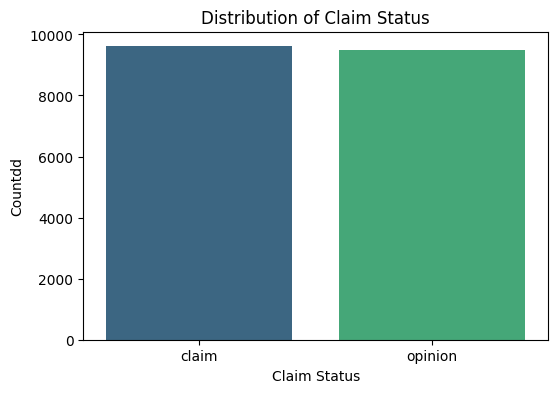

In [14]:
claim_counts = df["claim_status"].value_counts()
plt.figure(figsize=(6,4))
sns.barplot(x=claim_counts.index, y=claim_counts.values, palette="viridis")

# Etiketler ve başlık
plt.xlabel("Claim Status")
plt.ylabel("Countdd")
plt.title("Distribution of Claim Status")
plt.show()

The data is balanced. The number of claims and opinions is nearly the same.

claim_status
claim      166373.331182
opinion      1092.729844
Name: video_like_count, dtype: float64


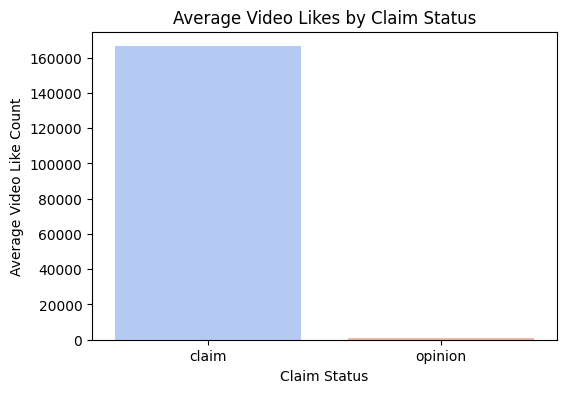

In [15]:
# video_like mean by claim status
print(df.groupby("claim_status")["video_like_count"].mean())
like_means = df.groupby("claim_status")["video_like_count"].mean()

# Barplot çiz
plt.figure(figsize=(6,4))
sns.barplot(x=like_means.index, y=like_means.values, palette="coolwarm")

# Etiketler ve başlık
plt.xlabel("Claim Status")
plt.ylabel("Average Video Like Count")
plt.title("Average Video Likes by Claim Status")
plt.show()

This is very interesting information. The average view count for videos with a claim status is around 166,000, while for those with an opinion status, it is significantly lower at approximately 1,092. This suggests that videos containing claims tend to attract more views compared to opinion-based content.

Additionally, we know that video_like_count has a very high correlation with video_view_count, video_download_count, and video_share_count. This means that these features also exhibit significant differences between claim and opinion statuses.

This information will be useful when developing our ML model.


claim_status
claim      501029.452748
opinion      4956.432250
Name: video_view_count, dtype: float64


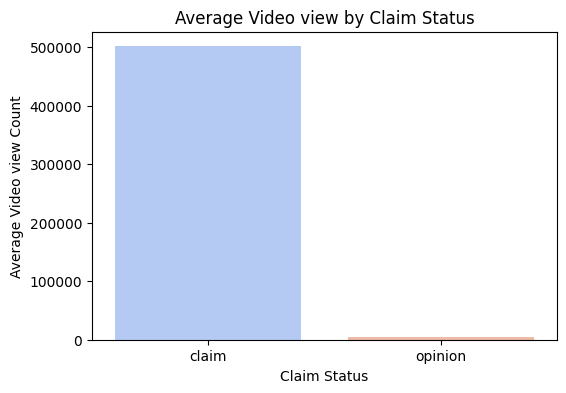

In [16]:
# Another visualization example
# video_view mean by claim status
print(df.groupby("claim_status")["video_view_count"].mean())
like_means = df.groupby("claim_status")["video_view_count"].mean()

# Barplot
plt.figure(figsize=(6,4))
sns.barplot(x=like_means.index, y=like_means.values, palette="coolwarm")


plt.xlabel("Claim Status")
plt.ylabel("Average Video view Count")
plt.title("Average Video view by Claim Status")
plt.show()

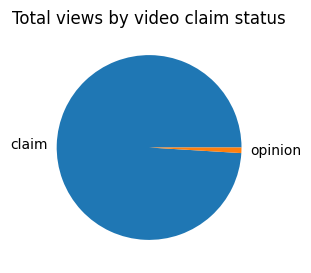

In [17]:
fig = plt.figure(figsize=(3,3))
plt.pie(df.groupby('claim_status')['video_view_count'].sum(), labels=['claim', 'opinion'])
plt.title('Total views by video claim status');

Now we know that if a video’s claim status is ‘opinion’, it gets fewer views compared to videos with a ‘claim’ status.

In [18]:
df.groupby(['claim_status', 'author_ban_status']).count()[['#']]

#
claim_status author_ban_status      
claim        active             6566
             banned             1439
             under review       1603
opinion      active             8817
             banned              196
             under review        463

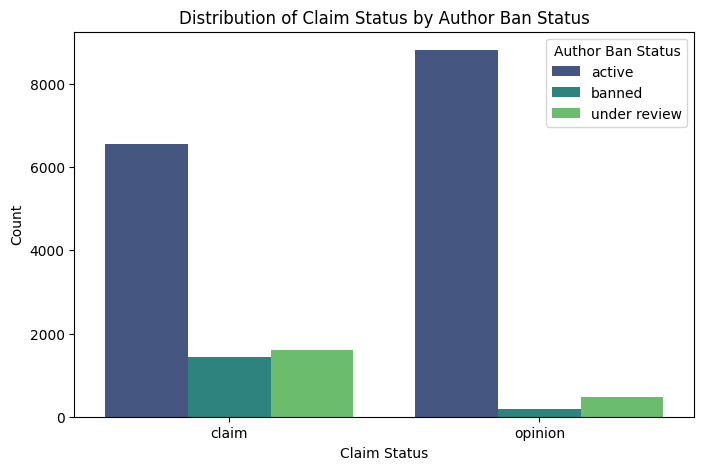

In [19]:
grouped_df = df.groupby(['claim_status', 'author_ban_status']).count()[['#']].reset_index()

plt.figure(figsize=(8, 5))
sns.barplot(x="claim_status", y="#", hue="author_ban_status", data=grouped_df, palette="viridis")

plt.xlabel("Claim Status")
plt.ylabel("Count")
plt.title("Distribution of Claim Status by Author Ban Status")
plt.legend(title="Author Ban Status")
plt.show()

We can see that banned authors generally post content with a claim status. 

In [20]:
df.groupby(['author_ban_status']).agg(
    {'video_view_count': ['count', 'mean', 'median'],
     'video_like_count': ['count', 'mean', 'median'],
     'video_share_count': ['count', 'mean', 'median']
     })

video_view_count                          video_like_count  \
                             count           mean    median            count   
author_ban_status                                                              
active                       15383  215927.039524    8616.0            15383   
banned                        1635  445845.439144  448201.0             1635   
under review                  2066  392204.836399  365245.5             2066   

                                           video_share_count                \
                            mean    median             count          mean   
author_ban_status                                                            
active              71036.533836    2222.0             15383  14111.466164   
banned             153017.236697  105573.0              1635  29998.942508   
under review       128718.050339   71204.5              2066  25774.696999   

                            
                    median  
author_ban_status           
active               437.0  
banned             14468.0  
under review        9444.0

Banned authors and those under review get far more views, likes, and shares than active authors. 
In most groups, the mean is much greater than the median, which indicates that there are some videos with very high engagement counts.

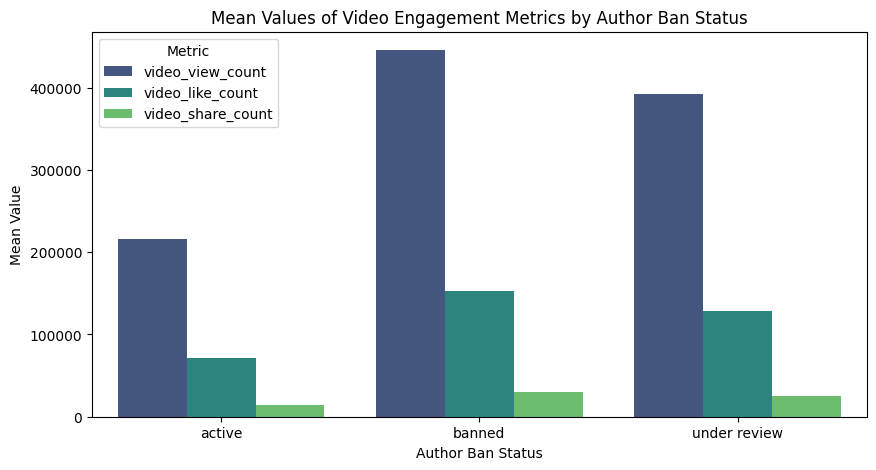

In [21]:
# Veriyi gruplama ve reset_index ile DataFrame'e dönüştürme
grouped_df = df.groupby(['author_ban_status']).agg(
    {'video_view_count': 'mean',
     'video_like_count': 'mean',
     'video_share_count': 'mean'}).reset_index()

# Veriyi uzun formata çevirelim (melt), çünkü Seaborn barplot bu formatı seviyor
grouped_df = grouped_df.melt(id_vars='author_ban_status', var_name='Feature', value_name='Mean Value')

# Barplot çizme
plt.figure(figsize=(10, 5))
sns.barplot(x='author_ban_status', y='Mean Value', hue='Feature', data=grouped_df, palette='viridis')

# Etiketler ve başlık
plt.xlabel("Author Ban Status")
plt.ylabel("Mean Value")
plt.title("Mean Values of Video Engagement Metrics by Author Ban Status")
plt.legend(title="Metric")
plt.show()

In [22]:
# Create a likes_per_view column
df['likes_per_view'] = df['video_like_count'] / df['video_view_count']

# Create a comments_per_view column
df['comments_per_view'] = df['video_comment_count'] / df['video_view_count']

# Create a shares_per_view column
df['shares_per_view'] = df['video_share_count'] / df['video_view_count']


In [23]:
df.groupby(['claim_status', 'author_ban_status']).agg(
    {'likes_per_view': ['count', 'mean', 'median'],
     'comments_per_view': ['count', 'mean', 'median'],
     'shares_per_view': ['count', 'mean', 'median']})

likes_per_view                      \
                                        count      mean    median   
claim_status author_ban_status                                      
claim        active                      6566  0.329542  0.326538   
             banned                      1439  0.345071  0.358909   
             under review                1603  0.327997  0.320867   
opinion      active                      8817  0.219744  0.218330   
             banned                       196  0.206868  0.198483   
             under review                 463  0.226394  0.228051   

                               comments_per_view                      \
                                           count      mean    median   
claim_status author_ban_status                                         
claim        active                         6566  0.001393  0.000776   
             banned                         1439  0.001377  0.000746   
             under review                   1603  0.001367  0.000789   
opinion      active                         8817  0.000517  0.000252   
             banned                          196  0.000434  0.000193   
             under review                    463  0.000536  0.000293   

                               shares_per_view                      
                                         count      mean    median  
claim_status author_ban_status                                      
claim        active                       6566  0.065456  0.049279  
             banned                       1439  0.067893  0.051606  
             under review                 1603  0.065733  0.049967  
opinion      active                       8817  0.043729  0.032405  
             banned                        196  0.040531  0.030728  
             under review                  463  0.044472  0.035027

We can see that the ratios are nearly the same across all author_ban_status categories when the claim_status is ‘claim’. The same applies to the ‘opinion’ status as well.

We know that videos by banned authors and those under review tend to get far more views, likes, and shares than videos by non-banned authors. However, when a video does get viewed, its engagement rate is less related to author ban status and more related to its claim status.

Also, we know that claim videos have a higher view rate than opinion videos, but this tells us that claim videos also have a higher rate of likes on average, so they are more favorably received as well. Furthermore, they receive more engagement via comments and shares than opinion videos.

Note that for claim videos, banned authors have slightly higher likes/view and shares/view rates than active authors or those under review. However, for opinion videos, active authors and those under review both get higher engagement rates than banned authors in all categories.
**Engagement level is strongly correlated with claim status. This should be a focus of further inquiry.**

Videos with banned authors have significantly higher engagement than videos with active authors. Videos with authors under review fall between these two categories in terms of engagement levels.

## Outliers
We need to identify outliers; otherwise, our ML model might make incorrect predictions.
So, let’s analyze the data more deeply

In [24]:
import math

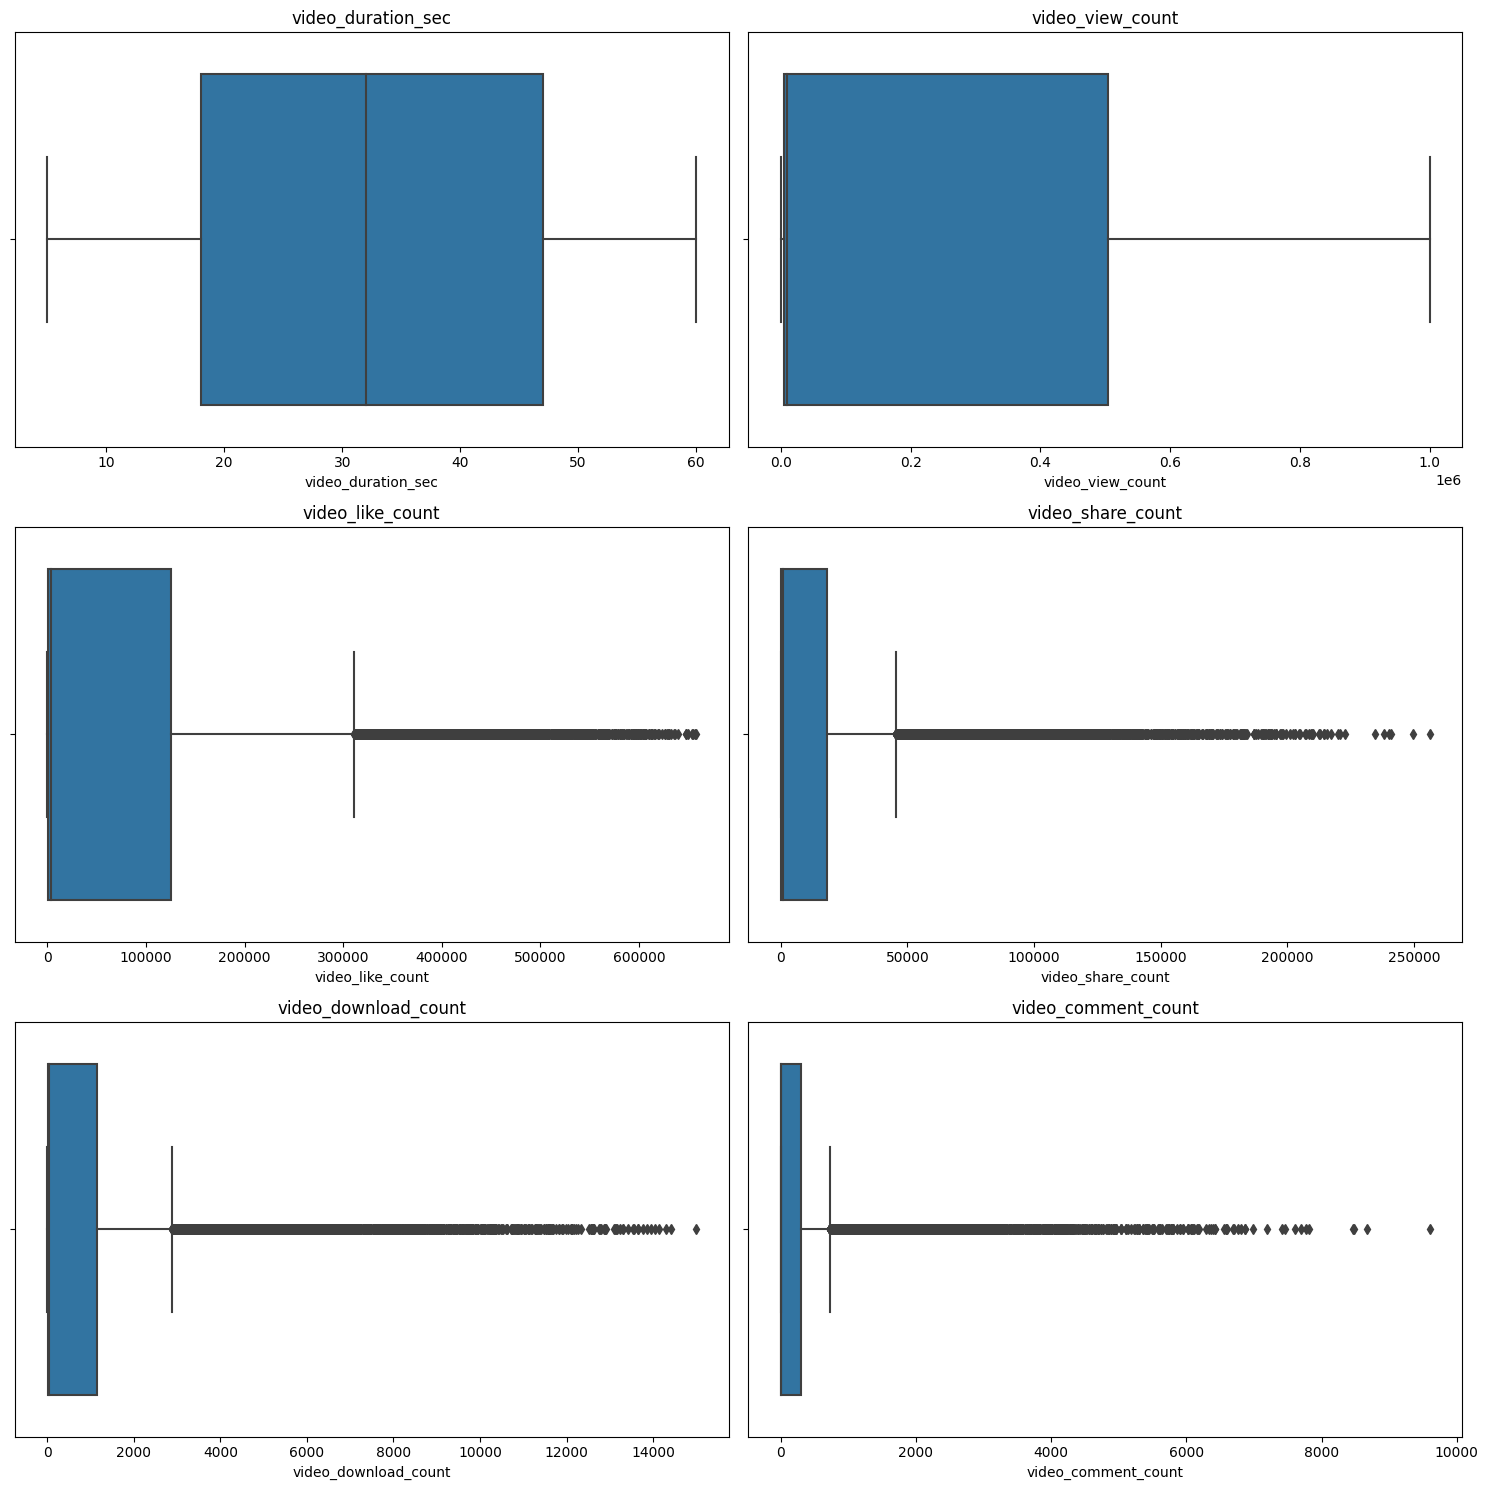

In [25]:

# Kaç satır gerektiğini hesapla (Her satırda 2 grafik olacak)
num_cols = 2
num_rows = math.ceil(len(discrete_columns) / num_cols)

# Figür oluştur
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Eğer tek bir satır varsa, axes'i listeye çevirerek hatayı önleyelim
axes = axes.flatten()

# Her sütun için ayrı boxplot çiz
for i, col in enumerate(discrete_columns):
    sns.boxplot(x=df[col], ax=axes[i])
    axes[i].set_title(f"{col}")

# Kullanılmayan boş hücreleri kaldır (Eğer sütun sayısı tekse)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

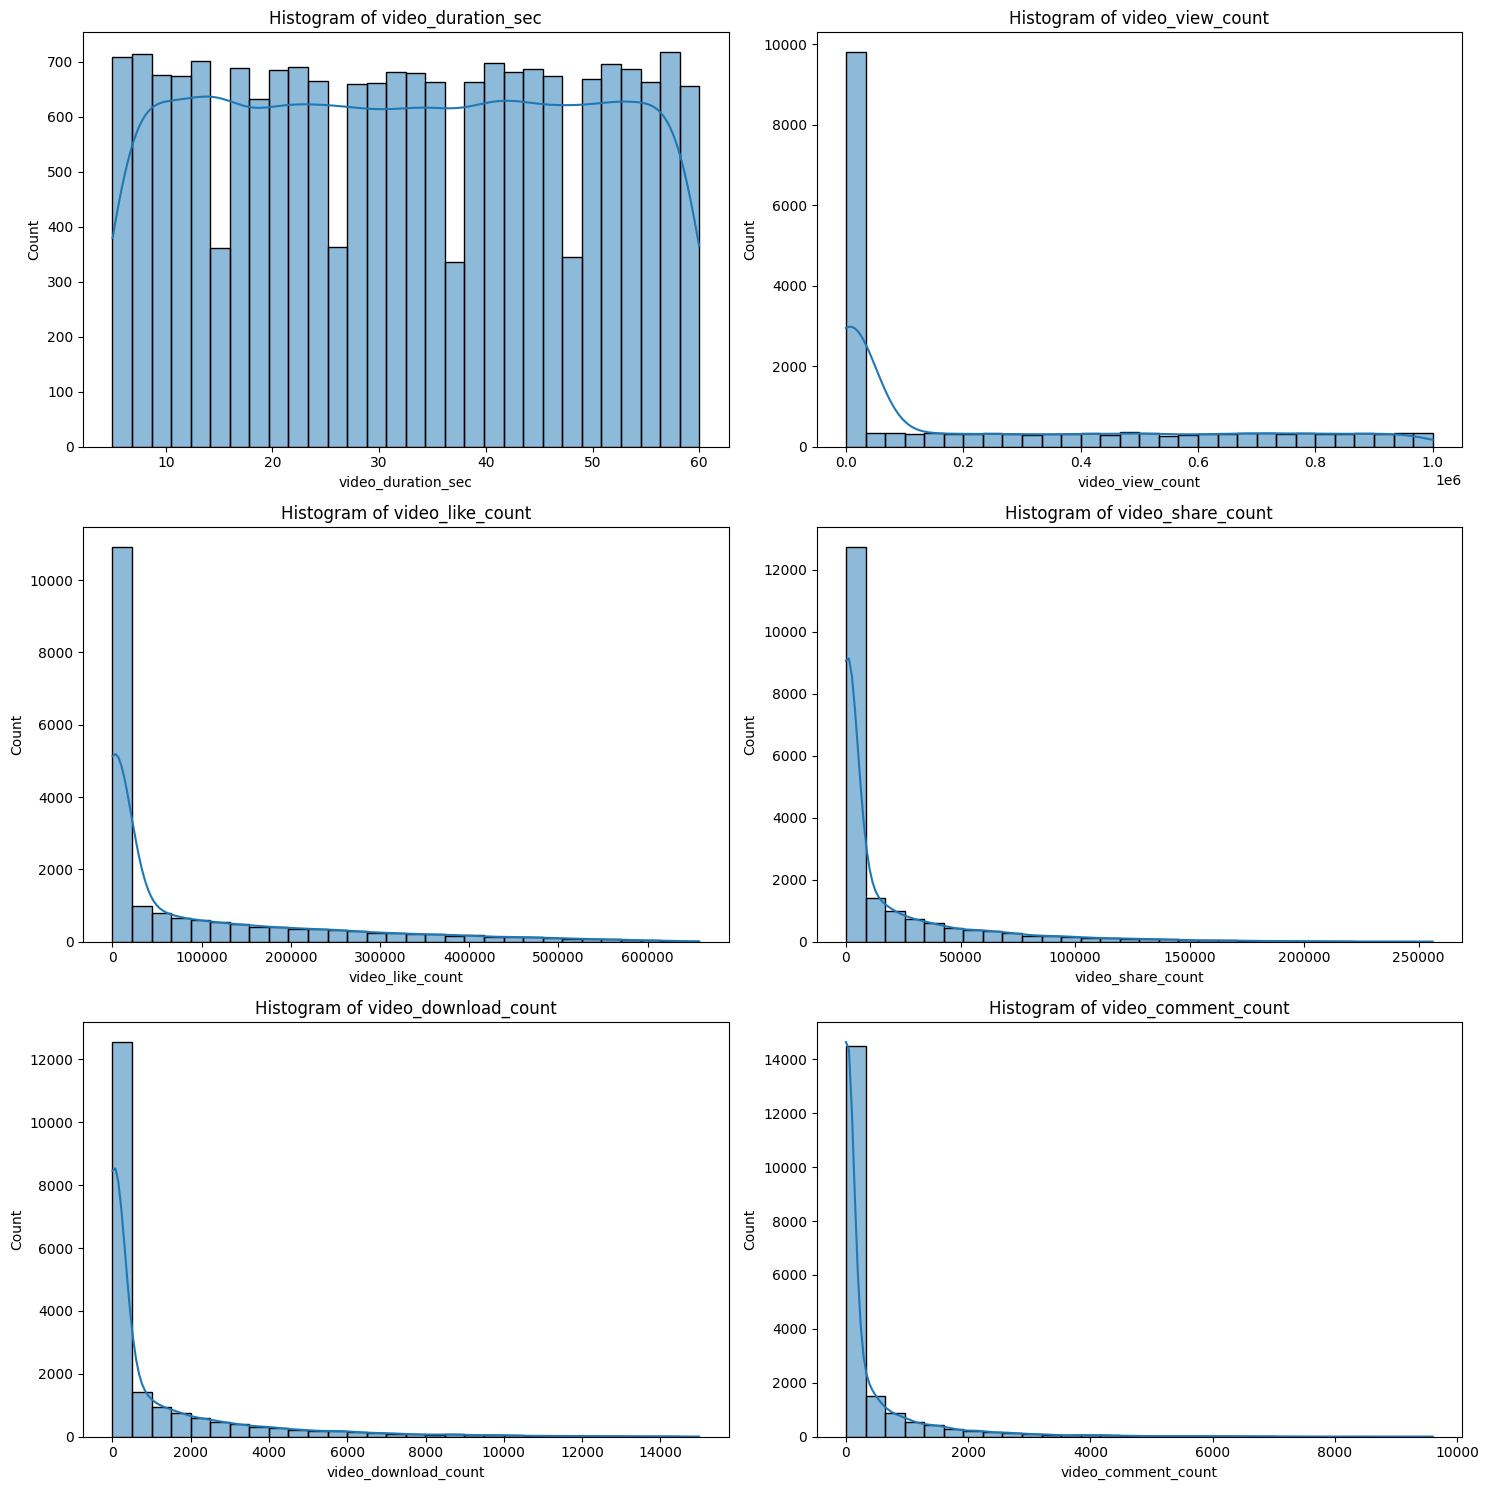

In [26]:


# Figür oluştur
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))

# Eğer tek bir satır varsa, axes'i listeye çevirerek hatayı önleyelim
axes = axes.flatten()

# Her sütun için ayrı histogram çiz
for i, col in enumerate(discrete_columns):
    sns.histplot(df[col], bins=30, kde=True, ax=axes[i])  # KDE = Yoğunluk Eğrisi
    axes[i].set_title(f"Histogram of {col}")

# Kullanılmayan boş hücreleri kaldır (Eğer sütun sayısı tekse)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

The video_duration_sec values range from 0 to 60, and the distribution appears to be even.
The video_view_count variable is skewed, with the median close to 0 while Q3 is around 0.5.
The other features contains outliers and variables is skewed which should be addressed to ensure a more reliable analysis.

When building predictive models, the presence of outliers can be problematic. For example, if you were trying to predict the view count of a particular video, videos with extremely high view counts might introduce bias to a model. Also, some outliers might indicate problems with how data was captured or recorded.

The ultimate objective of the TikTok project is to build a model that predicts whether a video is a claim or opinion. The analysis you've performed indicates that a video's engagement level is strongly correlated with its claim status. There's no reason to believe that any of the values in the TikTok data are erroneously captured, and they align with expectation of how social media works: a very small proportion of videos get super high engagement levels. That's the nature of viral content.


Number of outliers, video_view_count: 0
video_view_count: Data within 3IQR = 100.00%


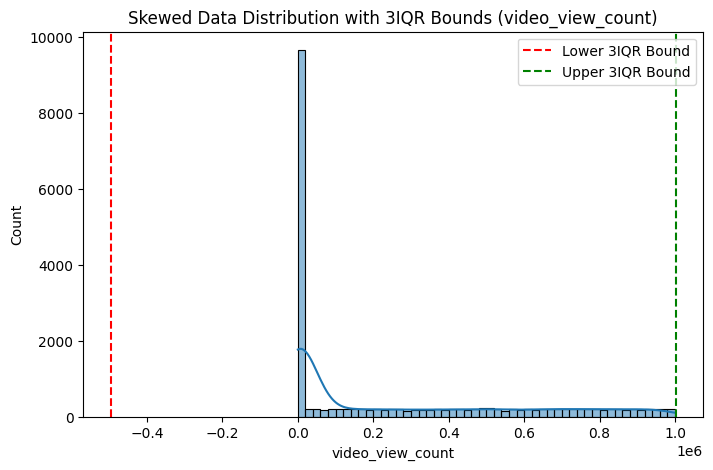

Number of outliers, video_like_count: 1091
video_like_count: Data within 3IQR = 86.91%


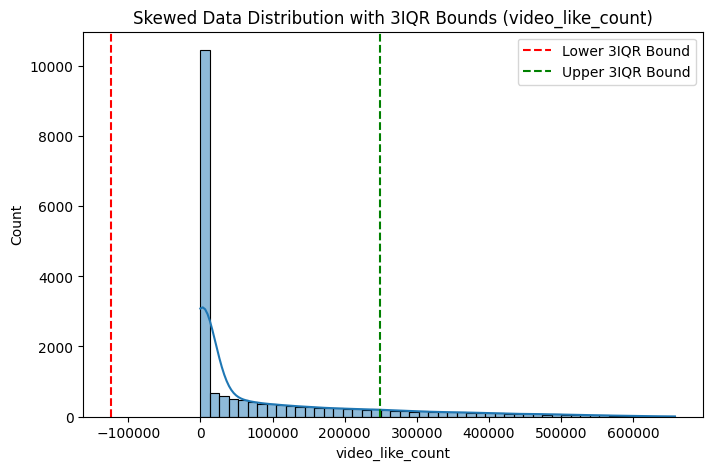

Number of outliers, video_share_count: 2047
video_share_count: Data within 3IQR = 83.91%


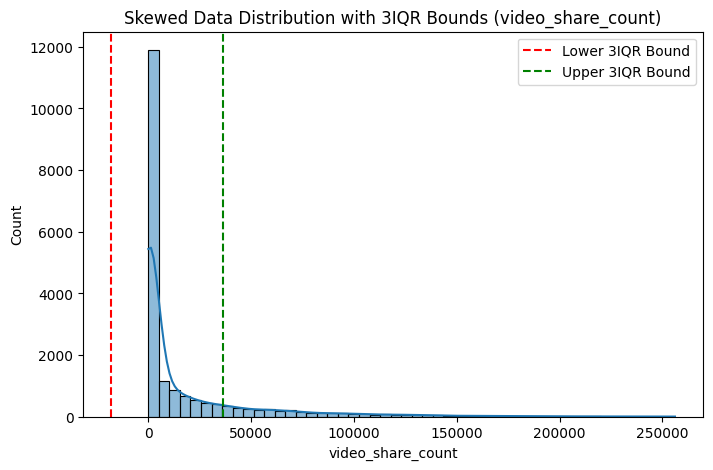

Number of outliers, video_download_count: 1967
video_download_count: Data within 3IQR = 84.02%


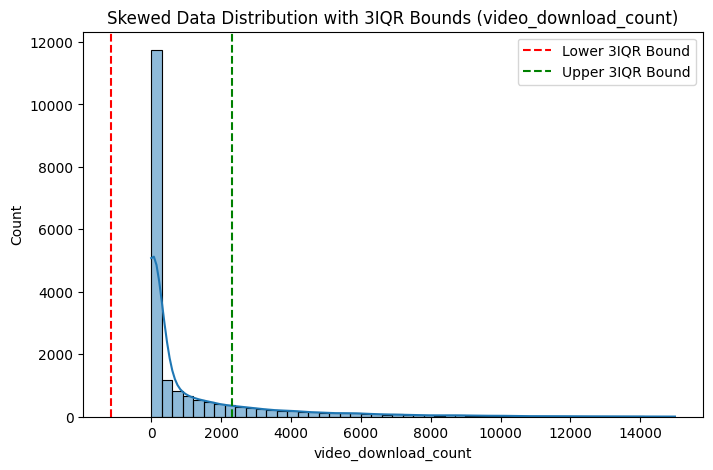

Number of outliers, video_comment_count: 2410
video_comment_count: Data within 3IQR = 82.91%


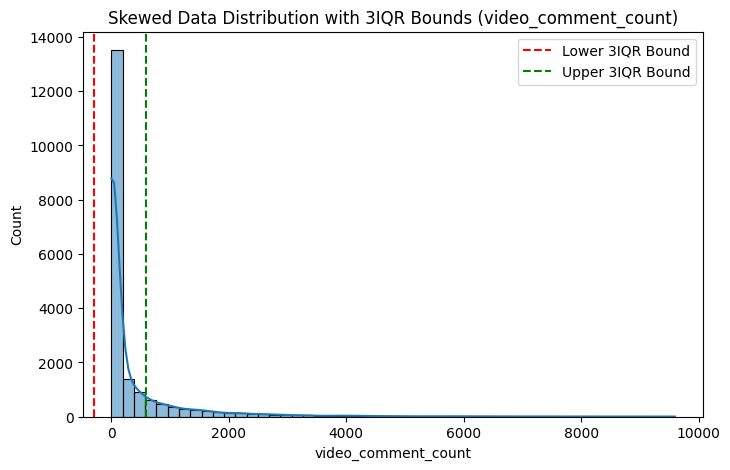

In [27]:
count_cols = ['video_view_count',
              'video_like_count',
              'video_share_count',
              'video_download_count',
              'video_comment_count']

for column in count_cols:
    # Sütunu DataFrame'den al ve Inf değerlerini NaN olarak değiştir
    data = df[column].replace([np.inf, -np.inf], np.nan).dropna()  # Inf → NaN ve eksik değerleri kaldır

    # IQR hesaplama
    Q1 = np.percentile(data, 25)
    Q3 = np.percentile(data, 75)
    IQR = Q3 - Q1

    # 3IQR sınırlarını hesapla
    lower_bound = Q1 - 1 * IQR
    upper_bound = Q3 + 1 * IQR

    # 3IQR içinde kalan verinin yüzdesini hesapla
    within_3IQR = ((data >= lower_bound) & (data <= upper_bound)).mean() * 100
    median = data.median()
    outlier_threshold = median + 3 * IQR
    # Count the number of values that exceed the outlier threshold
    outlier_count = (data> outlier_threshold).sum()
    print(f'Number of outliers, {column}:', outlier_count)
    print(f"{column}: Data within 3IQR = {within_3IQR:.2f}%")

    # Dağılımı görselleştir
    plt.figure(figsize=(8,5))
    sns.histplot(data, bins=50, kde=True)
    plt.axvline(lower_bound, color='r', linestyle='dashed', label="Lower 3IQR Bound")
    plt.axvline(upper_bound, color='g', linestyle='dashed', label="Upper 3IQR Bound")
    plt.title(f"Skewed Data Distribution with 3IQR Bounds ({column})")
    plt.legend()
    plt.show()

In [28]:
# We can use 3 IQR for detecting outliers. 
df1 = df.copy()
for col in count_cols: 
    
    # IQR hesaplama
    Q1 = np.percentile(df1[col], 25)
    Q3 = np.percentile(df1[col], 75)
    IQR = Q3 - Q1

    # 3IQR sınırlarını hesapla
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    df1.loc[df1[col] > upper_bound, col] = upper_bound
    df1.loc[df1[col] < lower_bound, col] = lower_bound


## Resutls of EDA 
- Claims and opinions show significant differences in view_count, like_count, download_count, and comment_count.
- We handled outliers by setting values above the 3IQR upper bound to the upper bound.

# Mission 2 - Hypothesis Test

𝐻0
: There is no difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to chance or sampling variability).

𝐻𝐴
: There is a difference in number of views between TikTok videos posted by verified accounts and TikTok videos posted by unverified accounts (any observed difference in the sample data is due to an actual difference in the corresponding population means).

In [29]:
# Import packages for statistical analysis/hypothesis testing
from scipy import stats

In [30]:
df1.groupby("verified_status")["video_view_count"].mean()

verified_status
not verified    265663.785339
verified         91439.164167
Name: video_view_count, dtype: float64

In [31]:
not_verified = df1[df1["verified_status"] == "not verified"]["video_view_count"]
verified =  df1[df1["verified_status"] == "verified"]["video_view_count"]
stats.ttest_ind(a=not_verified, b=verified, equal_var=False)

TtestResult(statistic=25.499441780633777, pvalue=2.6088823687177816e-120, df=1571.1630743874234)

Since the p-value is extremely small (much smaller than the significance level of 5%), you reject the null hypothesis. You conclude that there **is** a statistically significant difference in the mean video view count between verified and unverified accounts on TikTok.

# Mission 3  - Regression Analysis
The TikTok team has reviewed the results of the hypothesis testing. TikTok’s Operations Lead,is interested in how different variables are associated with whether a user is verified. 
Earlier, the data team **observed that if a user is verified, they are much more likely to post opinions. Now, the data team has decided to explore how to predict verified status to help them understand how video characteristics relate to verified users.** Therefore, you have been asked to conduct a logistic regression using verified status as the outcome variable. The results may be used to inform the final model related to predicting whether a video is a claim vs an opinion.


In [32]:
# Import packages for data preprocessing
from sklearn.preprocessing import OneHotEncoder
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.utils import resample

# Import packages for data modeling
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

In [33]:
df1.head()

,#,claim_status,video_id,video_duration_sec,video_transcription_text,verified_status,author_ban_status,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view
0,1,claim,7017666017,59,someone shared with me that drone deliveries a...,not verified,under review,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702
1,2,claim,4014381136,32,someone shared with me that there are more mic...,not verified,active,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111
2,3,claim,9859838091,31,someone shared with me that american industria...,not verified,active,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168
3,4,claim,1866847991,25,someone shared with me that the metro of st. p...,not verified,active,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569
4,5,claim,7105231098,19,someone shared with me that the number of busi...,not verified,active,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175


In [34]:
# is dependent variable binary ? 
df1["verified_status"].unique()

array(['not verified', 'verified'], dtype=object)

In [35]:
# Drop rows with missing values
df1 = df1.dropna(axis=0)

## Examining Class Balance 

In [36]:
# Check verified_status class balance
df1["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.93712
verified        0.06288
Name: proportion, dtype: float64

Approximately 93.7% of the dataset represents videos posted by unverified accounts and 6.3% represents videos posted by verified accounts. So the outcome variable is not very balanced.

In [37]:
# Use resampling to create class balance in the outcome variable, if needed

# Identify data points from majority and minority classes
data_majority = df1[df1["verified_status"] == "not verified"]
data_minority = df1[df1["verified_status"] == "verified"]

# Upsample the minority class (which is "verified")
data_minority_upsampled = resample(data_minority,
                                 replace=True,                 # to sample with replacement
                                 n_samples=len(data_majority), # to match majority class
                                 random_state=0)               # to create reproducible results

# Combine majority class with upsampled minority class
data_upsampled = pd.concat([data_majority, data_minority_upsampled]).reset_index(drop=True)

# Display new class counts
data_upsampled["verified_status"].value_counts()

verified_status
not verified    17884
verified        17884
Name: count, dtype: int64

In [38]:
# Check again verified_status class balance
data_upsampled["verified_status"].value_counts(normalize=True)

verified_status
not verified    0.5
verified        0.5
Name: proportion, dtype: float64

### length of each video_transcription_text
The length of video_transcription_text might provide meaningful insights when determining whether a user is verified or not.

In [39]:
# Extract the length of each `video_transcription_text` and add this as a column to the dataframe
data_upsampled["text_length"] = data_upsampled["video_transcription_text"].apply(func=lambda text: len(text))

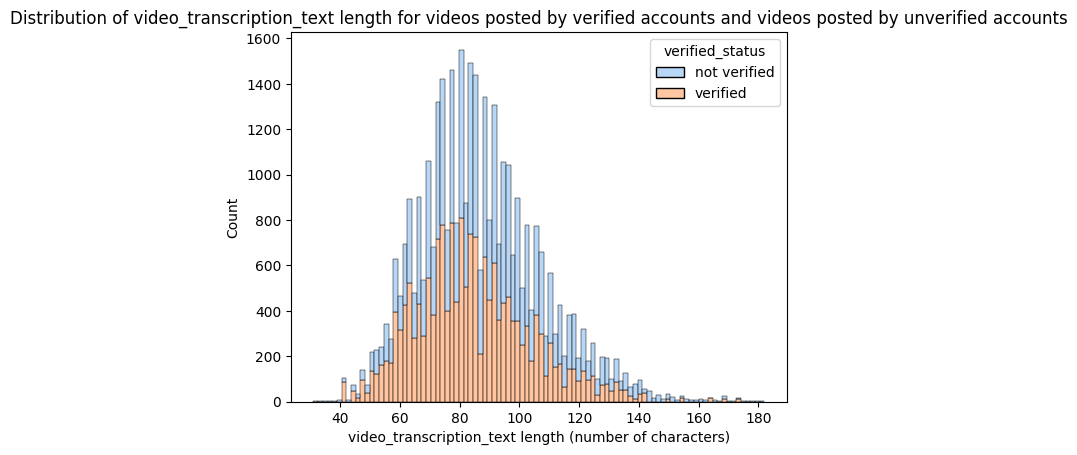

In [40]:
# Visualize the distribution of `video_transcription_text` length for videos posted by verified accounts and videos posted by unverified accounts
# Create two histograms in one plot
sns.histplot(data=data_upsampled, stat="count", multiple="stack", x="text_length", kde=False, palette="pastel", 
             hue="verified_status", element="bars", legend=True)
plt.title("Seaborn Stacked Histogram")
plt.xlabel("video_transcription_text length (number of characters)")
plt.ylabel("Count")
plt.title("Distribution of video_transcription_text length for videos posted by verified accounts and videos posted by unverified accounts")
plt.show()

Users who are not verified tend to have longer text compared to verified users.

## Exemine Correlations

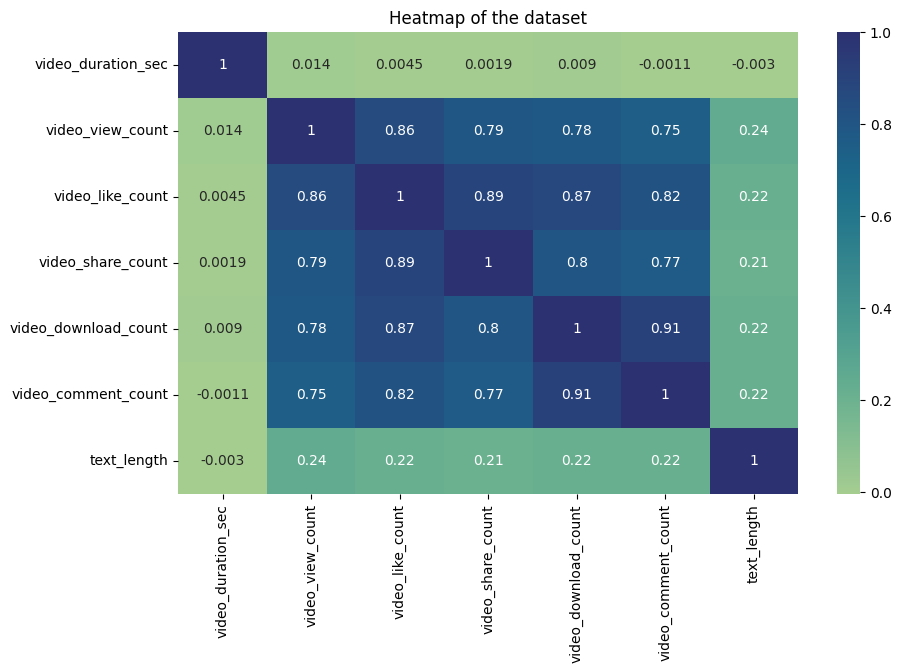

In [41]:
# Create a heatmap to visualize how correlated variables are

plt.figure(figsize=(10, 6))
sns.heatmap(
    data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", 
                    "video_like_count", "video_share_count", "video_download_count", "video_comment_count", "text_length"]]
    .corr(numeric_only=True), 
    annot=True, 
    cmap="crest")
plt.title("Heatmap of the dataset")
plt.show()

One of the model assumptions for logistic regression is no severe multicollinearity among the features. Take this into consideration as you examine the heatmap and choose which features to proceed with.

One of the model assumptions for logistic regression is no severe multicollinearity among the features. To build a logistic regression model that meets this assumption, you could exclude video_like_count. And among the variables that quantify video metrics, you could keep video_view_count, video_share_count, video_download_count, and video_comment_count as features.

### How to Understand the Multicollinearity Problem?
We can calculate the Variance Inflation Factor  (VIF) to understand multicollinearity
- if VIF > 5, multicollinearity exist 
- if VIF > 10, there is very strong multicollinearity and we should adress it 

In [42]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

X = df[['video_view_count', 'video_like_count', 'video_share_count',
       'video_download_count', 'video_comment_count' ]]  # Bağımsız değişkenleri seç
vif_data = pd.DataFrame()
vif_data["Feature"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)

                Feature       VIF
0      video_view_count  3.963443
1      video_like_count  9.863702
2     video_share_count  4.004185
3  video_download_count  6.809618
4   video_comment_count  3.881129


In [43]:
# We won't select video_like_count because of hight VIF 
X = data_upsampled[["video_duration_sec", "claim_status", "author_ban_status", "video_view_count", "video_share_count", "video_download_count", "video_comment_count"]]

# Display first few rows of features dataframe
X.head()

,video_duration_sec,claim_status,author_ban_status,video_view_count,video_share_count,video_download_count,video_comment_count
0,59,claim,under review,343296.0,241.0,1.0,0.0
1,32,claim,active,140877.0,19034.0,1161.0,684.0
2,31,claim,active,902185.0,2858.0,833.0,329.0
3,25,claim,active,437506.0,34812.0,1234.0,584.0
4,19,claim,active,56167.0,4110.0,547.0,152.0


 The `#` and `video_id` columns are not selected as features here, because they do not seem to be helpful for predicting whether a video presents a claim or an opinion. Also, `video_like_count` is not selected as a feature here, because it is strongly correlated with other features, as discussed earlier. And logistic regression has a no multicollinearity model assumption that needs to be met.

### Train - Test Split 


In [44]:
# Select outcome variable
y = data_upsampled["verified_status"]

In [45]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=0)

We know that:
	•	claim_status is an object-type variable with values: 'opinion', 'claim'.
	•	author_ban_status is an object-type variable with values: 'active', 'under review', 'banned'.

As shown above, the claim_status and author_ban_status features are currently categorical variables stored as objects. In order to use them with machine learning models in sklearn, these categorical features need to be converted into numeric format.

One way to achieve this is one-hot encoding.

In [46]:
# Select the training features that needs to be encoded
X_train_to_encode = X_train[["claim_status", "author_ban_status"]]

# Display first few rows
X_train_to_encode.head()

,claim_status,author_ban_status
33058,opinion,active
20491,opinion,active
25583,opinion,active
18474,opinion,active
27312,opinion,active


In [47]:
# Set up an encoder for one-hot encoding the categorical features
X_encoder = OneHotEncoder(drop='first', sparse_output=False)

In [48]:
# Fit and transform the training features using the encoder
X_train_encoded = X_encoder.fit_transform(X_train_to_encode)

In [49]:
# Get feature names from encoder
X_encoder.get_feature_names_out()

array(['claim_status_opinion', 'author_ban_status_banned',
       'author_ban_status_under review'], dtype=object)

In [50]:
# Display first few rows of encoded training features
X_train_encoded

array([[1., 0., 0.],
       [1., 0., 0.],
       [1., 0., 0.],
       ...,
       [1., 0., 0.],
       [1., 0., 0.],
       [0., 1., 0.]])

In [51]:
# Place encoded training features (which is currently an array) into a dataframe
X_train_encoded_df = pd.DataFrame(data=X_train_encoded, columns=X_encoder.get_feature_names_out())

# Display first few rows
X_train_encoded_df.head()

,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,1.0,0.0,0.0
1,1.0,0.0,0.0
2,1.0,0.0,0.0
3,1.0,0.0,0.0
4,1.0,0.0,0.0


In [52]:
# Display first few rows of `X_train` with `claim_status` and `author_ban_status` columns dropped (since these features are being transformed to numeric)
X_train.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
33058,33,2252.0,23.0,4.0,0.0
20491,52,6664.0,550.0,53.0,2.0
25583,37,6327.0,257.0,3.0,0.0
18474,57,1702.0,28.0,0.0,0.0
27312,21,3842.0,101.0,1.0,0.0


In [53]:
# Concatenate `X_train` and `X_train_encoded_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `claim_status` and `author_ban_status`,
# so that the indices align with those in `X_train_encoded_df` and `count_df`
X_train_final = pd.concat([X_train.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_train_encoded_df], axis=1)

# Display first few rows
X_train_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,33,2252.0,23.0,4.0,0.0,1.0,0.0,0.0
1,52,6664.0,550.0,53.0,2.0,1.0,0.0,0.0
2,37,6327.0,257.0,3.0,0.0,1.0,0.0,0.0
3,57,1702.0,28.0,0.0,0.0,1.0,0.0,0.0
4,21,3842.0,101.0,1.0,0.0,1.0,0.0,0.0


In [54]:
# Get unique values of outcome variable
y_train.unique()

array(['verified', 'not verified'], dtype=object)

In [55]:
# Set up an encoder for one-hot encoding the categorical outcome variable
y_encoder = OneHotEncoder(drop='first', sparse_output=False)

# Encode the training outcome variable
# Notes:
#   - Adjusting the shape of `y_train` before passing into `.fit_transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.fit_transform()`, so that it can be used later to train the model
y_train_final = y_encoder.fit_transform(y_train.values.reshape(-1, 1)).ravel()

# Display the encoded training outcome variable
y_train_final

array([1., 1., 1., ..., 1., 1., 0.])

## Model Building 

In [56]:
# Construct a logistic regression model and fit it to the training set
log_clf = LogisticRegression(random_state=0, max_iter=800).fit(X_train_final, y_train_final)

In [57]:
# Select the testing features that needs to be encoded
X_test_to_encode = X_test[["claim_status", "author_ban_status"]]

# Display first few rows
X_test_to_encode.head()

,claim_status,author_ban_status
21061,opinion,active
31748,opinion,active
20197,claim,active
5727,claim,active
11607,opinion,active


In [58]:
# Transform the testing features using the encoder
X_test_encoded = X_encoder.transform(X_test_to_encode)
# Place encoded testing features (which is currently an array) into a dataframe
X_test_encoded_df = pd.DataFrame(data=X_test_encoded, columns=X_encoder.get_feature_names_out())

X_test.drop(columns=["claim_status", "author_ban_status"]).head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count
21061,41,2118.0,57.0,5.000,2.0
31748,27,5701.0,157.0,1.000,0.0
20197,31,449767.0,45382.5,2880.125,728.5
5727,19,792813.0,45382.5,2880.125,728.5
11607,54,2044.0,68.0,19.000,2.0


In [59]:
# Concatenate `X_test` and `X_test_encoded_df` to form the final dataframe for training data (`X_test_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_test after dropping `claim_status`, and `author_ban_status`,
# so that the indices align with those in `X_test_encoded_df` and `test_count_df`
X_test_final = pd.concat([X_test.drop(columns=["claim_status", "author_ban_status"]).reset_index(drop=True), X_test_encoded_df], axis=1)

# Display first few rows
X_test_final.head()

,video_duration_sec,video_view_count,video_share_count,video_download_count,video_comment_count,claim_status_opinion,author_ban_status_banned,author_ban_status_under review
0,41,2118.0,57.0,5.000,2.0,1.0,0.0,0.0
1,27,5701.0,157.0,1.000,0.0,1.0,0.0,0.0
2,31,449767.0,45382.5,2880.125,728.5,0.0,0.0,0.0
3,19,792813.0,45382.5,2880.125,728.5,0.0,0.0,0.0
4,54,2044.0,68.0,19.000,2.0,1.0,0.0,0.0


## Predict Model


In [60]:
# Use the logistic regression model to get predictions on the encoded testing set
y_pred = log_clf.predict(X_test_final)

In [61]:
# Encode the testing outcome variable
# Notes:
#   - Adjusting the shape of `y_test` before passing into `.transform()`, since it takes in 2D array
#   - Using `.ravel()` to flatten the array returned by `.transform()`, so that it can be used later to compare with predictions
y_test_final = y_encoder.transform(y_test.values.reshape(-1, 1)).ravel()

# Display the encoded testing outcome variable
y_test_final

array([1., 1., 1., ..., 0., 1., 1.])

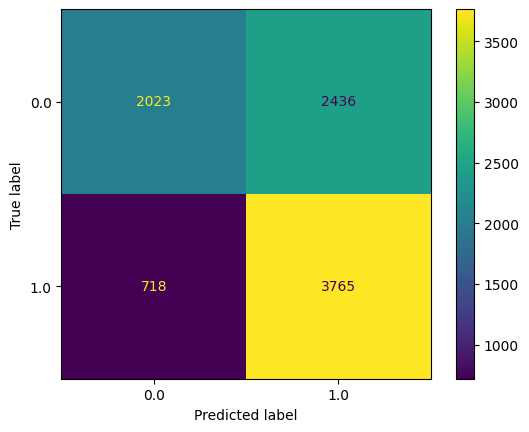

In [62]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y_test_final, y_pred, labels=log_clf.classes_)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=log_clf.classes_)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [63]:
# Create classification report for logistic regression model
target_labels = ["verified", "not verified"]
print(classification_report(y_test_final, y_pred, target_names=target_labels))

              precision    recall  f1-score   support

    verified       0.74      0.45      0.56      4459
not verified       0.61      0.84      0.70      4483

    accuracy                           0.65      8942
   macro avg       0.67      0.65      0.63      8942
weighted avg       0.67      0.65      0.63      8942



The classification report above shows that the logistic regression model achieved a precision of 61% and a recall of 84%, and it achieved an accuracy of 65%. Note that the precision and recall scores are taken from the "not verified" row of the output because that is the target class that we are most interested in predicting. The "verified" class has its own precision/recall metrics, and the weighted average represents the combined metrics for both classes of the target variable.

# Misson 4 - ML 
In this activity, you will practice using machine learning techniques to predict on a binary outcome variable.

The purpose of this model is to mitigate misinformation in videos on the TikTok platform.

The goal of this model is to predict whether a TikTok video presents a "claim" or presents an "opinion".

Select an evaluation metric

To determine which evaluation metric might be best, consider how the model might be wrong. There are two possibilities for bad predictions:

False positives: When the model predicts a video is a claim when in fact it is an opinion
False negatives: When the model predicts a video is an opinion when in fact it is a claim
What are the ethical implications of building the model? In the given scenario, it's better for the model to predict false positives when it makes a mistake, and worse for it to predict false negatives. It's very important to identify videos that break the terms of service, even if that means some opinion videos are misclassified as claims. The worst case for an opinion misclassified as a claim is that the video goes to human review. The worst case for a claim that's misclassified as an opinion is that the video does not get reviewed and it violates the terms of service. A video that violates the terms of service would be considered posted from a "banned" author, as referenced in the data dictionary.

Because it's more important to minimize false negatives, the model evaluation metric will be recall.

In [64]:
# Import packages for data preprocessing
from sklearn.feature_extraction.text import CountVectorizer

# Import packages for data modeling
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import classification_report, accuracy_score, precision_score, \
recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay

from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from xgboost import plot_importance

**Feature selection and transformation**

In [65]:
df2 = df1.copy()
# Drop unnecessary columns
df2 = df2.drop(['#', 'video_id'], axis=1)
# Encode target variable
df2['claim_status'] = df2['claim_status'].replace({'opinion': 0, 'claim': 1})
# Dummy encode remaining categorical values
df2 = pd.get_dummies(df2,
                   columns=['verified_status', 'author_ban_status'],
                   drop_first=True)
df2.head()

,claim_status,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,1,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,False,False,True
1,1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,False,False,False
2,1,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,False,False,False
3,1,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,False,False,False
4,1,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,False,False,False


In [98]:
# Isolate target variable
y2 = df2['claim_status']

In [99]:
# Isolate features
df2_X = df2.drop(['claim_status'], axis=1)

# Display first few rows of features dataframe
df2_X.head()

,video_duration_sec,video_transcription_text,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,author_ban_status_banned,author_ban_status_under review
0,59,someone shared with me that drone deliveries a...,343296.0,19425.0,241.0,1.0,0.0,0.056584,0.000000,0.000702,False,False,True
1,32,someone shared with me that there are more mic...,140877.0,77355.0,19034.0,1161.0,684.0,0.549096,0.004855,0.135111,False,False,False
2,31,someone shared with me that american industria...,902185.0,97690.0,2858.0,833.0,329.0,0.108282,0.000365,0.003168,False,False,False
3,25,someone shared with me that the metro of st. p...,437506.0,239954.0,34812.0,1234.0,584.0,0.548459,0.001335,0.079569,False,False,False
4,19,someone shared with me that the number of busi...,56167.0,34987.0,4110.0,547.0,152.0,0.622910,0.002706,0.073175,False,False,False


In [100]:
# Split the data into training and testing sets
X2_tr, X2_test, y2_tr, y2_test = train_test_split(df2_X, y2, test_size=0.2, random_state=0)

In [101]:
# Split the training data into training and validation sets
X2_train, X2_val, y2_train, y2_val = train_test_split(X2_tr, y2_tr, test_size=0.25, random_state=0)

In [102]:
# Get shape of each training, validation, and testing set
X2_train.shape, X2_val.shape, X2_test.shape, y2_train.shape, y2_val.shape, y2_test.shape

((11450, 13), (3817, 13), (3817, 13), (11450,), (3817,), (3817,))

The feature `video_transcription_text` is text-based. It is not a categorical variable, since it does not have a fixed number of possible values. One way to extract numerical features from it is through a bag-of-words algorithm like [`CountVectorizer`](https://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.CountVectorizer.html).

`CountVectorizer` works by splitting text into n-grams, which are groups of n consecutive words. For instance, "a dime for a cup of coffee" (phrase A) broken into 2-grams would result in six two-word combinations:

`a dime` | `dime for` |`for a`| `a cup` | `cup of` | `of coffee` |

Then, the next sample's text would be parsed into 2-grams. So, "ask for a cup for a child" (phrase B) would result in:

`ask for` |`for a`| `a cup` | `cup for` | `for a` | `a child` |

This process would repeat for each observation in the dataset, and each n-gram would be treated like a distinct feature. Then, the text of each observation is compared to the full array of n-grams, and the numbers of occurrences are tallied:

|  | `a dime` |`dime for`  |`for a`| `a cup` | `cup of` | `of coffee` | `ask for` | `cup for` | `a child` |
|--: |:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|:-:|
|phrase A |1|1|1|1|1|1|0|0|0|
|phrase B |0|0|2|1|1|0|1|1|1|
|**TOTAL**|1|1|3|2|2|1|1|1|1|

This would happen for the text of each observation in the data, and the text of each observation is parsed to get tallies for all the 2-word phrases from the entire data set for each observation, creating a large matrix.

If text is broken into 1-grams, then each feature in the matrix is an individual word.

After the count matrix has been created, `CountVectorizer` lets you the choose to keep only the most frequently occurring n-grams. You specify how many. The n-grams that you select can then be used as features in a model.

Splitting text into n-grams is an example of tokenization. Tokenization is the process of breaking text into smaller units to derive meaning from the resulting tokens.

This notebook breaks each video's transcription text into both 2-grams and 3-grams, then takes the 15 most frequently occurring tokens from the entire dataset to use as features.

In [103]:
# Set up a `CountVectorizer` object, which converts a collection of text to a matrix of token counts
count_vec = CountVectorizer(ngram_range=(2, 3),
                            max_features=15,
                            stop_words='english')
count_vec


CountVectorizer(max_features=15, ngram_range=(2, 3), stop_words='english')

In [104]:
# Extract numerical features from `video_transcription_text` in the training set
count_data = count_vec.fit_transform(X2_train['video_transcription_text']).toarray()
# Place the numerical representation of `video_transcription_text` from training set into a dataframe
count_df = pd.DataFrame(data=count_data, columns=count_vec.get_feature_names_out())

# Display first few rows
count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [105]:
# Concatenate `X_train` and `count_df` to form the final dataframe for training data (`X_train_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_train after dropping `video_transcription_text`,
# so that the indices align with those in `X_train` and `count_df`
X2_train_final = pd.concat([X2_train.drop(columns=['video_transcription_text']).reset_index(drop=True), count_df], axis=1)

# Display first few rows
X2_train_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,51,2487.0,310.0,20.0,1.0,0.0,0.124648,0.000000,0.008042,False,...,0,0,0,0,0,0,0,0,0,0
1,43,118512.0,3543.0,374.0,70.0,29.0,0.029896,0.000245,0.003156,False,...,0,1,0,0,0,0,0,0,0,0
2,22,105902.0,1885.0,229.0,39.0,9.0,0.017799,0.000085,0.002162,False,...,0,1,0,0,0,0,0,0,0,0
3,17,9245.0,1670.0,440.0,13.0,4.0,0.180638,0.000433,0.047593,False,...,0,0,0,0,0,0,0,0,0,0
4,18,3791.0,660.0,63.0,9.0,1.0,0.174097,0.000264,0.016618,False,...,0,0,0,0,0,0,0,0,0,0


In [106]:
# Extract numerical features from `video_transcription_text` in the testing set
validation_count_data = count_vec.transform(X2_val['video_transcription_text']).toarray()
# Place the numerical representation of `video_transcription_text` from validation set into a dataframe
validation_count_df = pd.DataFrame(data=validation_count_data, columns=count_vec.get_feature_names_out())
validation_count_df.head()

,colleague discovered,colleague learned,colleague read,discovered news,discussion board,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0
3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [107]:
# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
# Note: Using `.reset_index(drop=True)` to reset the index in X_val after dropping `video_transcription_text`,
# so that the indices align with those in `validation_count_df`
X2_val_final = pd.concat([X2_val.drop(columns=['video_transcription_text']).reset_index(drop=True), validation_count_df], axis=1)

# Display first few rows
X2_val_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,11,578891.0,311333.875,14612.0,2880.125,44.0,0.655730,0.000076,0.025241,False,...,0,0,0,0,0,0,0,1,0,0
1,24,6255.0,1709.000,311.0,13.000,1.0,0.273221,0.000160,0.049720,False,...,0,0,0,0,0,0,0,0,0,0
2,35,410356.0,249714.000,26235.0,2060.000,728.5,0.608530,0.003051,0.063932,False,...,0,1,0,0,0,0,0,1,0,0
3,58,406911.0,25986.000,1230.0,564.000,248.0,0.063862,0.000609,0.003023,False,...,0,0,0,0,0,0,0,0,0,0
4,47,972573.0,138167.000,25320.0,2880.125,728.5,0.142063,0.000995,0.026034,False,...,0,0,0,0,0,0,0,1,0,0


In [108]:
# Extract numerical features from `video_transcription_text` in the testing set
test_count_data = count_vec.transform(X2_test['video_transcription_text']).toarray()

# Place the numerical representation of `video_transcription_text` from test set into a dataframe
test_count_df = pd.DataFrame(data=test_count_data, columns=count_vec.get_feature_names_out())

# Concatenate `X_val` and `validation_count_df` to form the final dataframe for training data (`X_val_final`)
X2_test_final = pd.concat([X2_test.drop(columns=['video_transcription_text']
                                      ).reset_index(drop=True), test_count_df], axis=1)
X2_test_final.head()

,video_duration_sec,video_view_count,video_like_count,video_share_count,video_download_count,video_comment_count,likes_per_view,comments_per_view,shares_per_view,verified_status_verified,...,friend learned,friend read,internet forum,learned media,media claim,news claim,point view,read media,social media,willing wager
0,54,692084.0,135956.000,16591.0,622.000,312.0,0.196444,0.000451,0.023973,False,...,0,0,0,1,1,0,0,0,0,0
1,37,5164.0,1858.000,36.0,17.000,1.0,0.359799,0.000194,0.006971,True,...,0,0,0,0,0,0,0,0,0,0
2,39,801951.0,311333.875,45382.5,2880.125,728.5,0.429157,0.003669,0.071835,False,...,0,0,0,0,0,0,0,0,0,0
3,44,6429.0,2314.000,847.0,17.000,5.0,0.359932,0.000778,0.131747,False,...,0,0,0,0,0,0,0,0,0,0
4,26,555780.0,106863.000,15348.0,252.000,91.0,0.192276,0.000164,0.027615,False,...,0,0,0,0,0,0,0,0,0,0


## Build a random forest model
Fit a random forest model to the training set. Use cross-validation to tune the hyperparameters and select the model that performs best on recall.

In [109]:
# Instantiate the random forest classifier
rf = RandomForestClassifier(random_state=0)

# Create a dictionary of hyperparameters to tune
cv_params = {'max_depth': [5, 7, None],
             'max_features': [0.3, 0.6],
            #  'max_features': 'auto'
             'max_samples': [0.7],
             'min_samples_leaf': [1,2],
             'min_samples_split': [2,3],
             'n_estimators': [75,100,200],
             }

# Define a list of scoring metrics to capture
scoring = ['accuracy', 'precision', 'recall', 'f1']

# Instantiate the GridSearchCV object
rf_cv = GridSearchCV(rf, cv_params, scoring=scoring, cv=5, refit='recall')

In [110]:
%%time
rf_cv.fit(X2_train_final, y2_train)

CPU times: user 9min 42s, sys: 617 ms, total: 9min 43s
Wall time: 9min 44s


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=0),
             param_grid={'max_depth': [5, 7, None], 'max_features': [0.3, 0.6],
                         'max_samples': [0.7], 'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 3],
                         'n_estimators': [75, 100, 200]},
             refit='recall', scoring=['accuracy', 'precision', 'recall', 'f1'])

In [121]:
import pickle
with open("forest_ml_tiktok.pkl", "wb") as file:
    pickle.dump(rf_cv, file)

print("Model başarıyla kaydedildi! ✅")

Model başarıyla kaydedildi! ✅


In [124]:
# 🔹 Kaydedilmiş modeli yükle
with open("forest_ml_tiktok.pkl", "rb") as file:
    rf_cv = pickle.load(file)

print("Model başarıyla yüklendi! ✅")

# Modeli test et
rf_cv.best_score_

Model başarıyla yüklendi! ✅


0.9960309122419572

In [111]:
# Examine best recall score
rf_cv.best_score_

0.9960309122419572

In [112]:
# Examine best parameters
rf_cv.best_params_

{'max_depth': None,
 'max_features': 0.6,
 'max_samples': 0.7,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'n_estimators': 200}

In [113]:
# Access the GridSearch results and convert it to a pandas df
rf_results_df = pd.DataFrame(rf_cv.cv_results_)
rf_results_df

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_max_features,param_max_samples,param_min_samples_leaf,param_min_samples_split,param_n_estimators,...,std_test_recall,rank_test_recall,split0_test_f1,split1_test_f1,split2_test_f1,split3_test_f1,split4_test_f1,mean_test_f1,std_test_f1,rank_test_f1
0,0.572870,0.016806,0.024043,0.000805,5,0.3,0.7,1,2,75,...,0.003067,61,0.998703,0.996102,0.995232,0.997405,0.994360,0.996360,0.001544,61
1,0.798286,0.020891,0.029940,0.001932,5,0.3,0.7,1,2,100,...,0.003067,61,0.998703,0.996102,0.995232,0.997405,0.993929,0.996274,0.001661,63
2,1.542221,0.038974,0.045688,0.000480,5,0.3,0.7,1,2,200,...,0.003301,65,0.998703,0.996102,0.995232,0.997405,0.993924,0.996273,0.001662,65
3,0.569580,0.016203,0.025567,0.003399,5,0.3,0.7,1,3,75,...,0.003067,61,0.998703,0.996102,0.995232,0.997405,0.994360,0.996360,0.001544,61
4,0.804392,0.031667,0.029595,0.001838,5,0.3,0.7,1,3,100,...,0.003067,61,0.998703,0.996102,0.995232,0.997405,0.993929,0.996274,0.001661,63
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
67,1.844760,0.078202,0.032719,0.001757,None,0.6,0.7,2,2,100,...,0.002276,21,0.998703,0.997405,0.996537,0.997405,0.995232,0.997056,0.001145,19
68,3.660462,0.155972,0.055752,0.004354,None,0.6,0.7,2,2,200,...,0.002276,21,0.998703,0.997405,0.996537,0.997405,0.995232,0.997056,0.001145,19
69,1.371705,0.041981,0.028296,0.001331,None,0.6,0.7,2,3,75,...,0.002559,36,0.998703,0.997405,0.996537,0.997405,0.994796,0.996969,0.001288,37
70,1.895828,0.055430,0.039229,0.008177,None,0.6,0.7,2,3,100,...,0.002276,21,0.998703,0.997405,0.996537,0.997405,0.995232,0.997056,0.001145,19


In [114]:
y2_pred = rf_cv.best_estimator_.predict(X2_val_final)

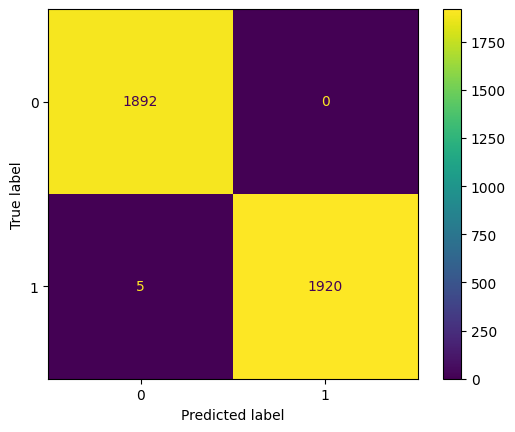

In [115]:
# Create a confusion matrix to visualize the results of the classification model

# Compute values for confusion matrix
log_cm = confusion_matrix(y2_val, y2_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.show()

In [116]:
# Create a classification report
# Create classification report for random forest model
target_labels = ['opinion', 'claim']
print(classification_report(y2_val, y2_pred, target_names=target_labels))

              precision    recall  f1-score   support

     opinion       1.00      1.00      1.00      1892
       claim       1.00      1.00      1.00      1925

    accuracy                           1.00      3817
   macro avg       1.00      1.00      1.00      3817
weighted avg       1.00      1.00      1.00      3817



In [117]:
# Use champion model to predict on test data
y2_pred = rf_cv.best_estimator_.predict(X2_test_final)

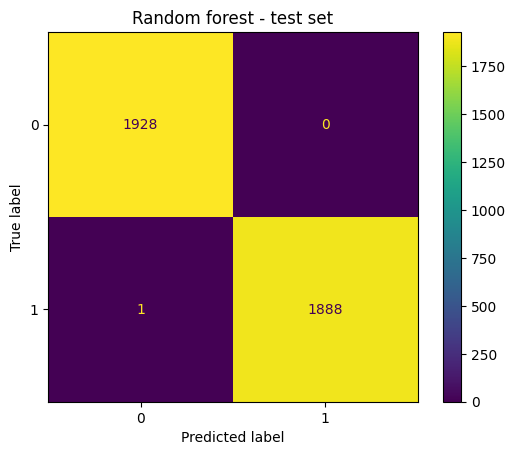

In [118]:
# Compute values for confusion matrix
log_cm = confusion_matrix(y2_test, y2_pred)

# Create display of confusion matrix
log_disp = ConfusionMatrixDisplay(confusion_matrix=log_cm, display_labels=None)

# Plot confusion matrix
log_disp.plot()

# Display plot
plt.title('Random forest - test set');
plt.show()

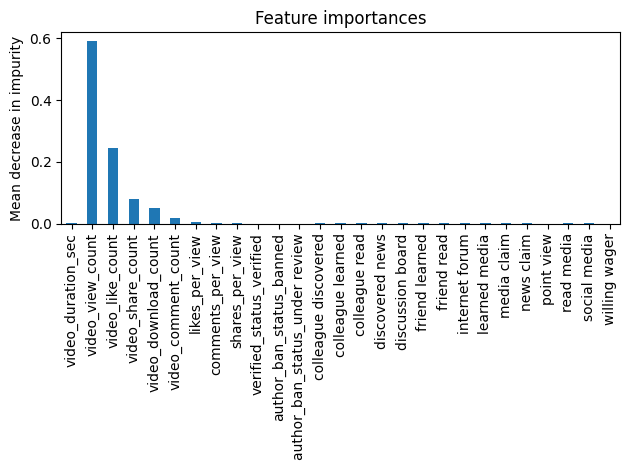

In [119]:
importances = rf_cv.best_estimator_.feature_importances_
rf_importances = pd.Series(importances, index=X2_test_final.columns)

fig, ax = plt.subplots()
rf_importances.plot.bar(ax=ax)
ax.set_title('Feature importances')
ax.set_ylabel('Mean decrease in impurity')
fig.tight_layout()

The most predictive features all were related to engagement levels generated by the video. This is not unexpected, as analysis from prior EDA pointed to this conclusion.